# **Launch Sites Locations Analysis with Folium**

In [2]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

## Task 1: Mark all launch sites on a map
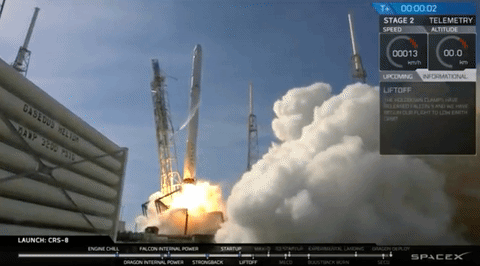

In [4]:
spacex_data=pd.read_csv('datasets/spacex_launch_geo.csv')
spacex_data.head()

Flight Number        Date Time (UTC) Booster Version  Launch Site  \
0              1  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1              2  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2              3  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3              4  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4              5  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   

                                             Payload  Payload Mass (kg)  \
0               Dragon Spacecraft Qualification Unit                0.0   
1  Dragon demo flight C1, two CubeSats,  barrel o...                0.0   
2                             Dragon demo flight C2+              525.0   
3                                       SpaceX CRS-1              500.0   
4                                       SpaceX CRS-2              677.0   

       Orbit         Customer        Landing Outcome  class        Lat  \
0        LEO           SpaceX  Failure   (parachute)      0  28.562302   
1  LEO (ISS)  NASA (COTS) NRO  Failure   (parachute)      0  28.562302   
2  LEO (ISS)      NASA (COTS)             No attempt      0  28.562302   
3  LEO (ISS)       NASA (CRS)             No attempt      0  28.562302   
4  LEO (ISS)       NASA (CRS)             No attempt      0  28.562302   

        Long  
0 -80.577356  
1 -80.577356  
2 -80.577356  
3 -80.577356  
4 -80.577356

In [7]:
spacex_df=spacex_data[['Launch Site','Lat','Long','class']]
spacex_df.head()

Launch Site        Lat       Long  class
0  CCAFS LC-40  28.562302 -80.577356      0
1  CCAFS LC-40  28.562302 -80.577356      0
2  CCAFS LC-40  28.562302 -80.577356      0
3  CCAFS LC-40  28.562302 -80.577356      0
4  CCAFS LC-40  28.562302 -80.577356      0

In [53]:
launch_site=spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_site
for lat,long in zip(launch_site['Lat'],launch_site['Long']):
    folium.Circle(
        location=[lat,long],
        radius=1000,
        color='#d35400',
        fill=True
        
    ).add_to(nasa_map)

# Create Map object

In [36]:
nasa_coordinates=[29.559684888503615, -95.0830971930759]
nasa_map=folium.Map(
    location=[29.559684888503615, -95.0830971930759],
    zoom_start=10
)
nasa_map

In [38]:
circle=folium.Circle(nasa_coordinates,radius=1000,color='#d35400',fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
marker=folium.Marker(
    nasa_coordinates,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC'
    )
)
nasa_map.add_child(circle)
# nasa_map.add_child(marker)

In [39]:
folium.Marker(
    location=[29.559684888503615, -95.0830971930759],
    popup='NASA Johnson Space Center',
).add_to(nasa_map)
nasa_map

# # Task 2: Mark the success/failed launches for each site on the map

In [46]:
launch_info=MarkerCluster().add_to(nasa_map)

In [54]:

for lat,long,site,cl in zip(spacex_data['Lat'],spacex_data['Long'],spacex_data['Launch Site'],spacex_data['class']):
    if cl==0:
        icong=folium.Icon(color='white',icon_color='red')
    else:
        icong=folium.Icon(color='white',icon_color='green')
    folium.Marker(
        location=[lat,long],
        icon=icong,
        popup=site
    ).add_to(launch_info)
        
nasa_map        

# TASK 3: Calculate the distances between a launch site to its proximities

In [56]:
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

nasa_map.add_child(mouse_position)
nasa_map

In [57]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [59]:
# Lat1: 28.56367  Lon1: -80.57163
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
launch_site

Launch Site        Lat        Long  class
0   CCAFS LC-40  28.562302  -80.577356      0
1  CCAFS SLC-40  28.563197  -80.576820      1
2    KSC LC-39A  28.573255  -80.646895      1
3   VAFB SLC-4E  34.632834 -120.610745      0

In [61]:
coordinates = [
    [28.56342, -80.57674],
    [28.56342, -80.56756]]

lines=folium.PolyLine(locations=coordinates, weight=1)
nasa_map.add_child(lines)
distance = calculate_distance(coordinates[0][0], coordinates[0][1], coordinates[1][0], coordinates[1][1])
distance_circle = folium.Marker(
    [28.56342, -80.56794],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
        )
    )
nasa_map.add_child(distance_circle)
nasa_map

In [62]:
coordinates = [
    [28.56342, -80.57674],
    [28.5383, -81.3792]]

lines=folium.PolyLine(locations=coordinates, weight=1)
nasa_map.add_child(lines)
distance = calculate_distance(coordinates[0][0], coordinates[0][1], coordinates[1][0], coordinates[1][1])
distance_circle = folium.Marker(
    [28.5383, -81.3792],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#252526;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
        )
    )
nasa_map.add_child(distance_circle)
nasa_map